In [1]:
import pandas as pd
import scipy as sc
import numpy as np
%pylab inline
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


In [2]:
def neutrino_data(IH=True):
    '''From http://www.nu-fit.org/?q=node/166
    and asumming a Normal Hierarchy:
    Output:
    mnu1in: laightest neutrino mass
    Dms2: \Delta m^2_{12}
    Dma2: \Delta m^2_{13}
    ThetSol,ThetAtm,ThetRec: in radians
    '''
    if not IH:
        Dms2=np.array([7.19e-5, 7.39e-5, 7.60e-5])*1e-18 # In GeV
        Dma2=np.array([2.493e-3, 2.523e-3, 2.55e-3])*1e-18 # In GeV
        #input real values:
        #
        ThetSol = np.array([0.298,  0.310,  0.323]) 
        ThetAtm = np.array([0.425,  0.558,  0.578])
        ThetRec = np.array([0.02176, 0.02241, 0.02301])
        DeltaCP = np.array([194*np.pi/180, 222*np.pi/180, 260*np.pi/180])
    else:
        Dms2=np.array([7.19e-5, 7.39e-5, 7.60e-5])*1e-18 # In GeV
        Dma2=np.array([-2.541e-3, -2.509e-3, -2.479e-3])*1e-18 # In GeV
        #input real values:
        #
        ThetSol = np.array([0.298,  0.310,  0.323]) 
        ThetAtm = np.array([0.537,  0.563,  0.582])
        ThetRec = np.array([0.02197, 0.02261, 0.02328])
        DeltaCP = np.array([259*np.pi/180.0, 285*np.pi/180.0, 309*np.pi/180.0])

    return Dms2,Dma2,ThetSol,ThetAtm,ThetRec,DeltaCP

def CasasIbarra(mnu1in=0.0,ranMnu=True,bestfit=True,IH=True):
    #import numpy as np
    #if ranMnu==True:
    #    bestfit=True
        
    Dms2,Dma2,ThetSol,ThetAtm,ThetRec,DeltaCP=neutrino_data(IH)
    
    # Phases of the PMNS matrix
    phases1=np.random.uniform(0.,0.0*np.pi,2)       # cero value for all phases         
    
    delta=1.*(0 if bestfit else np.random.uniform(DeltaCP[0],DeltaCP[2]))
    eta1 =1.*(0 if ranMnu else phases1[1])
    eta2 =1.*(0 if ranMnu else phases1[2])

    if not IH:
        mnu1=1.*(mnu1in      if bestfit else  10**((np.log10(2.5e-3)-np.log10(1e-9))*np.random.uniform(0,1)+np.log10(1e-9))*1e-9) 
        mnu2=1.*(np.sqrt(Dms2[1]+mnu1in**2)     if bestfit else  np.sqrt(np.random.uniform(Dms2[0],Dms2[2]) + mnu1**2)  ) 
        mnu3=1.*(np.sqrt(Dma2[1]+mnu1in**2)     if bestfit else  np.sqrt(np.random.uniform(Dma2[0],Dma2[2]) + mnu1**2)  )

        # Square root of left-handed neutrino mass matrix 
        DMnu = np.diag( [mnu3,mnu2,mnu1] )  
    else:
        mnu3=1.*(mnu1in      if bestfit else  10**((np.log10(2.5e-3)-np.log10(1e-9))*np.random.uniform(0,1)+np.log10(1e-9))*1e-9) 
        mnu2=1.*(np.sqrt(-Dma2[1]+mnu1in**2)     if bestfit else  np.sqrt(np.random.uniform(-Dma2[2],-Dma2[0]) + mnu3**2)  ) 
        mnu1=1.*(np.sqrt(-Dms2[1]+mnu2**2)     if bestfit else  np.sqrt(-np.random.uniform(Dms2[0],Dms2[2]) + mnu2**2)  )
        # Square root of left-handed neutrino mass matrix 
        DMnu = np.diag( [mnu2,mnu1,mnu3] )  

    #print "NEUTRINOS",mnu1,mnu2,mnu3

    # Mixing angles (up 3 sigma range)
    t12 = 1.*( np.arcsin(np.sqrt(ThetSol[1])) if bestfit else np.arcsin(np.sqrt(np.random.uniform(ThetSol[0],ThetSol[2]))))#np.arcsin(np.sqrt(ThetSol[1]))
    t23 = 1.*( np.arcsin(np.sqrt(ThetAtm[1])) if bestfit else np.arcsin(np.sqrt(np.random.uniform(ThetAtm[0],ThetAtm[2]))))
    t13 = 1.*( np.arcsin(np.sqrt(ThetRec[1])) if bestfit else np.arcsin(np.sqrt(np.random.uniform(ThetRec[0],ThetRec[2]))))         #np.arcsin(np.sqrt(ThetRec[1]))

    # Building PMNS matrix
    U12 = np.array([ [np.cos(t12), np.sin(t12),0], [-np.sin(t12), np.cos(t12),0], [0,0,1.0] ])
    U13 = np.array([ [np.cos(t13),0, np.sin(t13)* np.exp(-delta*1j)], [0,1.0,0], [-np.sin(t13)*np.exp(delta*1j),0, np.cos(t13)] ])
    U23 = np.array([ [1.0,0,0], [0, np.cos(t23), np.sin(t23)], [0, -np.sin(t23), np.cos(t23)] ])
    Uphases = np.array([ [np.exp(eta1*1j),0,0], [0, np.exp(eta2*1j),0], [0,0,1.0] ])
    #U = np.dot(U23,np.dot(U13,np.dot(U12,Uphases)))
    U = np.dot(U23,np.dot(U13,U12))
    return U, DMnu


if __name__=='__main__':
    print(np.abs( CasasIbarra(mnu1in=0.0,ranMnu=True,bestfit=True,IH=False) ))

[[[8.21302076e-01 5.50502407e-01 1.49699699e-01]
  [4.63050760e-01 4.89988544e-01 7.38576482e-01]
  [3.33236993e-01 6.75912958e-01 6.57339167e-01]]

 [[5.02294734e-11 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 8.59651092e-12 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]]]


In [3]:
def Const(Theta):
    return np.sin(2.0*Theta)/(16.0*np.pi**2)

def Masses(MH1, MH2, Ms, Theta, Lam5, Lam6, Lam8, Lam7, v, MZp, g1p):
    vs = MZp/(3.0*g1p)
    v2 = v*v; vs2 = vs*vs; MH12 = MH1*MH1; MH22 = MH2*MH2;
    Mu3 = (MH22-MH12)*np.sin(2.0*Theta)/(np.sqrt(2.0)*vs)
    Mu32 = Mu3*Mu3
    MS22 = 0.5*(MH12+MH22+np.sqrt((MH22-MH12)**2-2.0*Mu32*vs2))
    MS12 = 0.5*(MH12+MH22-np.sqrt((MH22-MH12)**2-2.0*Mu32*vs2))

    Mu12 = MS12+0.5*Lam5*v2+0.5*Lam7*vs2
    Mu22 = MS22+0.5*Lam6*v2+0.5*Lam8*vs2
    L_s = -0.5*(Ms/(vs))**2
    return L_s, Mu3, Mu12, Mu22, vs

def I(M1, M2, m):
    M12 = M1*M1; M22 = M2*M2; m2 = m*m
    return (m*(M22*np.log(M22/m2)/(M22-m2)-M12*np.log(M12/m2)/(M12-m2)))

def Inverse_Matrix(f23 = 1.0E-04, h11 = 1.0E-04, h22 = 1.0E-04, C = 0.001, MH1 = 500, MH2 = 700, IH=False):
    """Inverse neutrino mass matrix normalized by C from
        Mnu_diag=UR^T.(C f.ml.h).UL
        ,
        (Inverse_Zee_Matrix) = UR.Mnu_diag
        sgnm2=-1 guarantees real Yukawa couplings
        
    requires hep.py:
       https://github.com/restrepo/BSM-Toolbox/blob/master/tests/hep.py
    """
    m_e = 0.5109989461e-3; m_m = 0.1056583745; m_t = 1.77686
    ml = [I(MH1, MH2, m_e),I(MH1, MH2, m_m),I(MH1, MH2, m_t)]

    U_MNS, m = CasasIbarra(mnu1in=0.0,ranMnu=True,bestfit=True,IH=IH)
    X = np.dot(U_MNS,m)

    f = np.zeros((3,3))
    h = np.zeros((3,3))
    
    f[1,2] = f23
    h[0,0] = h11
    h[1,1] = h22
            
    f[0,2] = (f[1,2]*(X[0,1]*X[2,0]-X[0,0]*X[2,1]))/(X[1,1]*X[2,0]-X[1,0]*X[2,1])
    f[0,1] = (f[1,2]*(-(X[0,1]*X[1,0])+X[0,0]*X[1,1]))/(-(X[1,1]*X[2,0])+X[1,0]*X[2,1])
    
    f[2,0] =-f[0,2]
    f[2,1] =-f[1,2]
    f[1,0] =-f[0,1]
    
    h[1,0] = (C*f[1,2]*h[0,0]*ml[0]*(-(X[0,1]*X[2,0])+X[0,0]*X[2,1])+X[2,0]*(X[1,1]*X[2,0]-X[1,0]*X[2,1]))/(C*f[1,2]*ml[1]*(X[1,1]*X[2,0]-X[1,0]*X[2,1]))
    h[0,1] = ((C*f[1,2]*h[1,1]*ml[1]-X[2,1])*(-(X[1,1]*X[2,0])+X[1,0]*X[2,1]))/(C*f[1,2]*ml[0]*(X[0,1]*X[2,0]-X[0,0]*X[2,1]))
    h[2,1] = (C*f[1,2]*h[1,1]*ml[1]*(-(X[0,1]*X[1,0])+X[0,0]*X[1,1])+X[0,1]*(-(X[1,1]*X[2,0])+X[1,0]*X[2,1]))/(C*f[1,2]*ml[2]*(X[0,1]*X[2,0]-X[0,0]*X[2,1]))
    h[2,0] = (-(X[1,0]/(C*f[1,2]))+(h[0,0]*ml[0]*(-(X[0,1]*X[1,0])+X[0,0]*X[1,1]))/(-(X[1,1]*X[2,0])+X[1,0]*X[2,1]))/ml[2]
    
    return f, h

In [4]:
df1 = pd.read_hdf(path_or_buf='Datos_NSI_big_NH_III',key='process', mode='r')
df = pd.read_csv('Datos_raw_NSI_big_NH_III')

In [5]:
def n_phi(phi):
    if phi < 0:
        return np.pi/2-np.abs(phi)
    else:
        return phi

In [6]:
f = []
h = []

for i in range(len(df1['f23'])):
    C = Const(n_phi(df1['phi'][i]))
    f1, h1 = Inverse_Matrix(df1['f23'][i], df1[(3,1)][i], df1[(3,2)][i], C, df1['Mh1'][i], df1['Mh2'][i], IH=False)
    f.append(f1);  h.append(h1);

/home/jcallem/.local/lib/python3.5/site-packages/ipykernel_launcher.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
/home/jcallem/.local/lib/python3.5/site-packages/ipykernel_launcher.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
/home/jcallem/.local/lib/python3.5/site-packages/ipykernel_launcher.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
/home/jcallem/.local/lib/python3.5/site-packages/ipykernel_launcher.py:52: ComplexWarning: Casting complex values to real discards the imaginary part
/home/jcallem/.local/lib/python3.5/site-packages/ipykernel_launcher.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
/home/jcallem/.local/lib/python3.5/site-packages/ipykernel_launcher.py:54: ComplexWarning: Casting complex values to real discards the imaginary part


# GNI parameter

In [7]:
def A(f_i, f_j, phi, Mhp, MHp):
    Mhp2 = Mhp*Mhp; MHp2 = MHp*MHp;
    return f_i*f_j*((np.cos(phi)/Mhp2)**2-(np.sin(phi)/MHp2)**2)
 
def B(h_i, h_j, phi, Mhp, MHp):
    Mhp2 = Mhp*Mhp; MHp2 = MHp*MHp;
    return h_i*h_j*((np.sin(phi)/Mhp2)**2-(np.cos(phi)/MHp2)**2)

def C(h_i, f_j, phi, Mhp, MHp):
    Mhp2 = Mhp*Mhp; MHp2 = MHp*MHp;
    return h_i*f_j*np.sin(2*phi)*((1/Mhp2)**2-(1/MHp2)**2)

def D(f_i, h_j, phi, Mhp, MHp):
    Mhp2 = Mhp*Mhp; MHp2 = MHp*MHp;
    return f_i*h_j*np.sin(2*phi)/2*((1/Mhp2)**2+(1/MHp2)**2)

In [8]:
def epsilon_V(f_i, f_j, h_i, h_j, phi, Mhp, MHp):
    Mhp2 = Mhp*Mhp; MHp2 = MHp*MHp; GF = 1.1663787e-5;
    return (C(h_i, f_j, phi, Mhp, MHp)+D(h_i, f_j, phi, Mhp, MHp))/(4*np.sqrt(2)*GF)

def epsilon_A(f_i, f_j, h_i, h_j, phi, Mhp, MHp):
    Mhp2 = Mhp*Mhp; MHp2 = MHp*MHp; GF = 1.1663787e-5;
    return (C(h_i, f_j, phi, Mhp, MHp)+D(h_i, f_j, phi, Mhp, MHp))/(4*np.sqrt(2)*GF)

def epsilon_T(f_i, f_j, h_i, h_j, phi, Mhp, MHp):
    Mhp2 = Mhp*Mhp; MHp2 = MHp*MHp; GF = 1.1663787e-5;
    return -(A(f_i, f_j, phi, Mhp, MHp)+B(h_i, h_j, phi, Mhp, MHp))/(16*np.sqrt(2)*GF)

def epsilonT_V(f_i, f_j, h_i, h_j, phi, Mhp, MHp):
    Mhp2 = Mhp*Mhp; MHp2 = MHp*MHp; GF = 1.1663787e-5;
    return (D(h_i, f_j, phi, Mhp, MHp)-C(h_i, f_j, phi, Mhp, MHp))/(4*np.sqrt(2)*GF)

def epsilonT_A(f_i, f_j, h_i, h_j, phi, Mhp, MHp):
    Mhp2 = Mhp*Mhp; MHp2 = MHp*MHp; GF = 1.1663787e-5;
    return (D(h_i, f_j, phi, Mhp, MHp)-C(h_i, f_j, phi, Mhp, MHp))/(4*np.sqrt(2)*GF)

def epsilonT_T(f_i, f_j, h_i, h_j, phi, Mhp, MHp):
    Mhp2 = Mhp*Mhp; MHp2 = MHp*MHp; GF = 1.1663787e-5;
    return -(A(f_i, f_j, phi, Mhp, MHp)+B(h_i, h_j, phi, Mhp, MHp))/(4*np.sqrt(2)*GF)


In [9]:
def epsilon(mu1, nu1, mu, nu):
    epsilon_V11 = []
    epsilon_A11 = []
    epsilon_T11 = []
    epsilonT_V11 = []
    epsilonT_A11 = []
    epsilonT_T11 = []

    for i in range(len(f)):
        epsilon_V11.append(epsilon_V(f[i][mu,mu1], f[i][nu,nu1], h[i][mu1,mu], h[i][nu1,nu], n_phi(df1['phi'][i]), df1['Mh1'][i], df1['Mh2'][i]))
        epsilon_A11.append(epsilon_A(f[i][mu,mu1], f[i][nu,nu1], h[i][mu1,mu], h[i][nu1,nu], n_phi(df1['phi'][i]), df1['Mh1'][i], df1['Mh2'][i]))
        epsilon_T11.append(epsilon_T(f[i][mu,mu1], f[i][nu,nu1], h[i][mu1,mu], h[i][nu1,nu], n_phi(df1['phi'][i]), df1['Mh1'][i], df1['Mh2'][i]))
        epsilonT_V11.append(epsilonT_V(f[i][mu,mu1], f[i][nu,nu1], h[i][mu1,mu], h[i][nu1,nu], n_phi(df1['phi'][i]), df1['Mh1'][i], df1['Mh2'][i]))
        epsilonT_A11.append(epsilonT_A(f[i][mu,mu1], f[i][nu,nu1], h[i][mu1,mu], h[i][nu1,nu], n_phi(df1['phi'][i]), df1['Mh1'][i], df1['Mh2'][i]))
        epsilonT_T11.append(epsilonT_T(f[i][mu,mu1], f[i][nu,nu1], h[i][mu1,mu], h[i][nu1,nu], n_phi(df1['phi'][i]), df1['Mh1'][i], df1['Mh2'][i]))    
        
    return epsilon_V11, epsilon_A11, epsilon_T11, epsilonT_V11, epsilonT_A11, epsilonT_T11

In [10]:
mu1 = 0
nu1 = 0
mu = 1
nu = 1

epsilon_V11, epsilon_A11, epsilon_T11, epsilonT_V11, epsilonT_A11, epsilonT_T11 = epsilon(mu1, nu1, mu, nu)

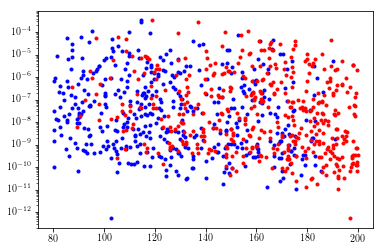

In [11]:
plt.plot(df1['Mh1'], np.real(epsilonT_T11),'b.')
plt.plot(df1['Mh2'], np.real(epsilonT_T11),'r.')
#plt.plot(df1['Mh2']-df1['Mh1'], np.real(epsilonT_T11),'r.')
#plt.xlim(80,200)
plt.yscale('log')

In [12]:
def epsilon_max(n_i, n_j, n_mu, n_nu, n_mu1, n_nu1):
    n = 0
    for i in range(len(h)-1):
        if np.abs(h[i+1][n_i,n_j]) > np.abs(h[n][n_i,n_j]):
            n = i+1

    eps_max = []
    for i in range(len(f)):
        eps_max.append(epsilonT_T(np.abs(f[n][n_mu1,0]), np.abs(f[n][n_nu1,0]), h[n][0,n_nu], h[n][0,n_mu], n_phi(df1['phi'][i]), df1['Mh1'][i], df1['Mh2'][i]))
    return eps_max


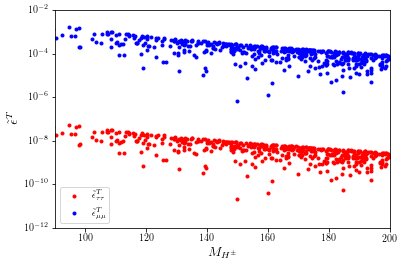

In [13]:
fig = plt.figure()
plt.plot(df1['Mh2'], np.real(epsilon_max(0, 0, 0, 0, 2, 0)),'r.', label = r"$\tilde{\epsilon}^{T}_{\tau \tau}$")
plt.plot(df1['Mh2'], np.real(epsilon_max(0, 1, 1, 1, 1, 0)),'b.', label = r"$\tilde{\epsilon}^{T}_{\mu \mu}$")

#plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$M_{H^{\pm}}$', fontsize=14)
plt.ylabel(r"$\tilde{\epsilon}^{T}$", fontsize=14)
#plt.title(r"Production cross section for W'")
plt.xlim(90,200)
plt.ylim(1e-12,1e-2)
plt.legend(loc="lower left") 
fig.savefig("GIN_NO.pdf", bbox_inches='tight')